<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Good)</span></div>

## 1 Differential Equations and Euler

In [2]:
from matplotlib import pyplot as plt

### 1.2 What do we mean by changes?

change in space
1. change in elevation as you walk along mountainous terrain,
1. change in the nutrients in the soil as you walk along a field,
1. change in nutrients as we dive into the ocean,

change in time
1. change in the concentration of a medicine in our blood as the day progresses,
1. change in the brightness of sunlight as the day progresses,
1. change in the population as time passes.

change in concentration
1. changes in how fast a chemical reaction occurs as the reagents’ concentration is depleted.


### 1.3 Calculus: Meaning and Notation

In [2]:
#dN(t)/dt = rN(t)
#r --> rate of growth
#dN/dt --> rate of change of N wrt t

### 1.4 Calculus: Getting a feel for \(\dfrac{dN}{dt}\)

In [5]:
# dy/dx --> how much y changes if you change x by a unit.
# similar to Δy/Δx

In [6]:
# dN/dt = rN(1-N/K)
# K --> carrying capacity

### 1.5 Solving Differential Equations

In [4]:
#solving a differential equation -->
#find a mathematical function that satisfies it

#Euler method is used often

### 1.6 The Euler Method

In [2]:

#differential equation 
#approcimate with a fraction
#use small steps to calculate the real number


### 1.7 Using Euler for the logistic equation

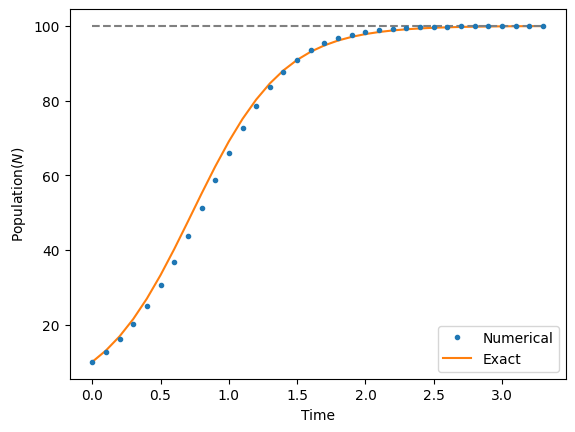

In [3]:
def logistic (time, N0, carrying_capacity, rate):
    C = 1/N0-1/carrying_capacity
    output = (1+C*carrying_capacity*np.exp(-rate*time))
    output = carrying_capacity/output
    return output

N_stop_difference = 1E-2

dt = .1
N0, K, rate = 10, 100, 3
data = {'time': [], 'N': []}
time, N = 0, N0

while True:
    data['time'].append(time)
    data['N'].append(N)

    dN = rate*N*(1-N/K)*dt
    N += dN
    time += dt
    
    try:
        if np.abs(data['N'][-1]-data['N'][-2]) <= N_stop_difference:
            break
    except IndexError:
        if len(data['N'])<2:
            pass
        else:
            print('Trouble')
            quit()
        
exact_data = logistic(time=np.array(data['time']),
                     N0=N0,
                     carrying_capacity=K,
                     rate=rate)

plt.plot(data['time'], data['N'], '.', label='Numerical')
plt.plot(data['time'], exact_data,
         label='Exact', zorder=1)
plt.legend(loc='lower right')
plt.ylabel('Population($N$)')
plt.xlabel('Time')
plt.hlines(K, 0, data['time'][-1],
           colors='grey', ls='dashed', zorder=1)
plt.show()

### 1.8 Some things to note about the code

1. use a dictionary to hold the time and population data. 

1. use a True condition with the while loop. should break out on my own.
1. To break out, check if the population has changed significantly. --> Never compare two floats!check if the difference between the two is as small as I want.
1. use np.abs() to not worry if the difference is negative.

## 2 Coupled Differential Equations: Predator-Prey Model

### 2.1 The equations

In [12]:
#dr/dt = 2r-2rf
#df/dt = 3fr-3f

### 2.2 Example code

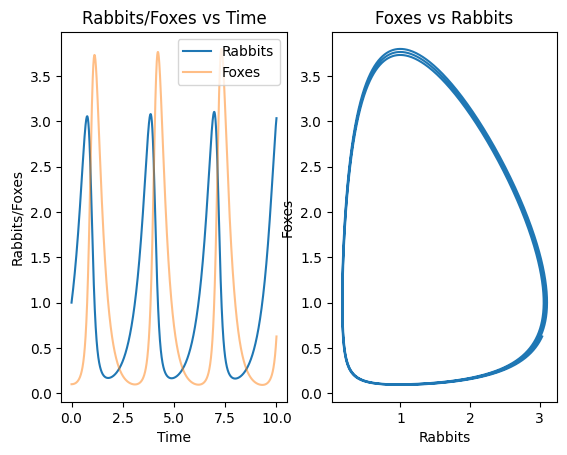

In [4]:
max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1
time, rabbits, foxes = 0, rabbits0, foxes0
data = []


def drabbits_dt(rabbits, foxes):
    a, b = 2, 2
    return a*rabbits - b*rabbits*foxes


def dfoxes_dt(rabbits, foxes):
    d, g = 3, 3
    return d*foxes*rabbits - g*foxes


while True:
    data.append([time, rabbits, foxes])

    rabbits_new = rabbits + drabbits_dt(rabbits, foxes)*dt

    foxes += dfoxes_dt(rabbits, foxes)*dt

    rabbits = rabbits_new

    time += dt

    if time > max_time:
        break

data = np.array(data)
data = {
    'time': data[:, 0],
    'rabbits': data[:, 1],
    'foxes': data[:, 2],
}

fig, ax = plt.subplots(nrows=1, ncols=2)
ax_with_time, ax_with_other = ax

# Plotting the individual species
ax_with_time.plot(data['time'], data['rabbits'], label='Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label='Foxes', alpha=.5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()

# Plotting one against the other
ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')

plt.show()

### 2.3 Some things to note about the code

1. be careful while excapsulating derivatives in function
1. need the old value (contained in rabbits) to calculate the new value for foxes --> use a new variable rabbit_new to hold the new value of rabbits temporarily
1. first used a list data to collect the data and split them into a dictionary later. 

## 3 Hello SciPy

### 3.1 SciPy odeint()

In [6]:
from scipy.integrate import odeint

### 3.2 Radioactivity

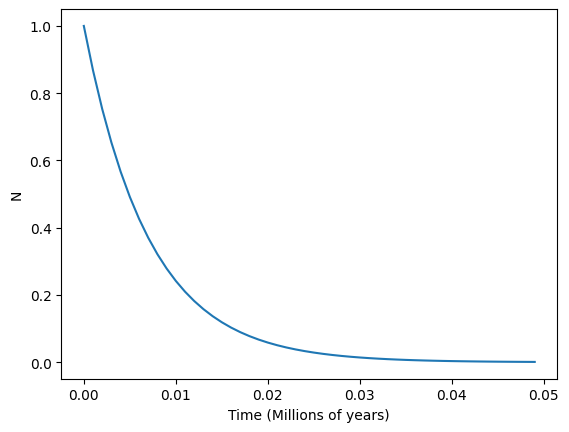

In [7]:
max_time = 0.05
dt = .001
decay_constant = 142
N0 = 1

def dNdt(N, time, decay_constant):   
    return - decay_constant*N


all_time = np.arange(0, max_time, dt)

all_N = odeint(y0=[N0],
               func=dNdt,
               t=all_time,
               args=(decay_constant,)
               )

plt.plot(all_time, all_N)
plt.ylabel('N')
plt.xlabel('Time (Millions of years)')

plt.show()

### 3.3 Logistic Equation

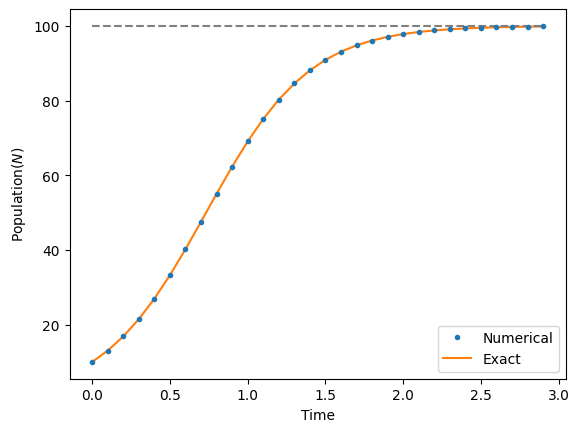

In [8]:
def dNdt(N, time, rate, carrying_capacity):
    return rate*N*(1-N/carrying_capacity)


max_time, dt = 3, .1
N0, K, rate = 10, 100, 3

data = {}
data['time'] = np.arange(0, max_time, dt)
data['N'] = odeint(dNdt, N0, data['time'], (rate, K))

exact_data = logistic(time=np.array(data['time']),
                     N0=N0,
                     carrying_capacity=K,
                     rate=rate)

plt.plot(data['time'], data['N'], '.', label='Numerical')
plt.plot(data['time'], exact_data,
         label='Exact', zorder=1)
plt.legend(loc='lower right')
plt.ylabel('Population($N$)')
plt.xlabel('Time')
plt.hlines(K, 0, data['time'][-1],
           colors='grey', ls='dashed', zorder=1)
plt.show()

### 3.4 Predator-Prey

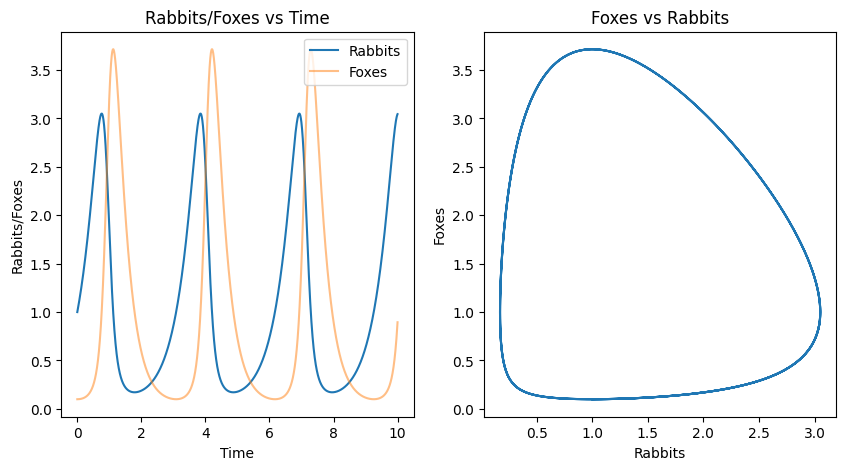

In [14]:
max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1

def dy_dt(y, t):
    
    rabbits, foxes = y

    a, b = 2, 2
    drabbits_dt = a*rabbits - b*rabbits*foxes

    d, g = 3, 3
    dfoxes_dt = d*foxes*rabbits - g*foxes

    return [drabbits_dt, dfoxes_dt]


data = {}
data['time'] = np.arange(0, max_time, dt)

results = odeint(y0=[rabbits0, foxes0],
                 func=dy_dt,
                 t=data['time']
                 )

data['rabbits'] = results[:, 0]
data['foxes'] = results[:, 1]

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
ax_with_time, ax_with_other = ax

ax_with_time.plot(data['time'], data['rabbits'], label='Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label='Foxes', alpha=.5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()

ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')

plt.show()

## Exercise 1 :  The Lorentz Attaractor

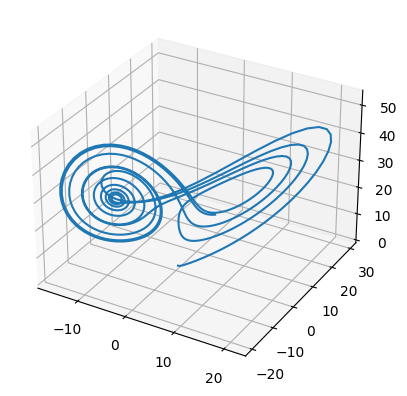

In [32]:
max_t = 50
dt = 0.01
x0, y0, z0= 0, 1, 0
time, x, y, z = 0, x0, y0, z0
data = []

def dx_dt(x,y,z):
    σ = 10
    return σ*(y-x)

def dy_dt(x,y,z):
    ρ = 28
    return x*(ρ-z)-y

def dz_dt(x,y,z):   
    β = 8/3
    return x*y - β*z

while True:
    data.append([time, x , y, z])
    
    x_new = x + dx_dt(x, y, z)*dt

    y_new = y + dy_dt(x, y, z)*dt

    z_new = z + dz_dt(x, y, z)*dt
    
    x = x_new
    
    y = y_new
    
    z = z_new

    time += dt

    if time > max_time:
        break
        
data = np.array(data)
data = {
    'x': data[:, 1],
    'y': data[:, 2],
    'z': data[:, 3],
}

        
ax = plt.axes(projection='3d')
ax.plot3D(data['x'] ,data['y'], data['z'])
plt.show()

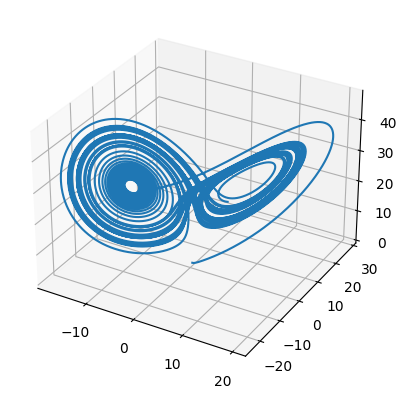

In [41]:
max_time = 50
dt = 0.001
x0, y0, z0 = 0, 1, 0

def dn_dt(n,t):
    
    x, y, z = n

    σ = 10
    dx_dt = σ*(y-x)

    ρ = 28
    dy_dt = x*(ρ-z)-y

    β = 8/3
    dz_dt = x*y - β*z
    
    return [dx_dt, dy_dt, dz_dt]


data = {}
data['time'] = np.arange(0, max_time, dt)

results = odeint(y0=[x0, y0, z0],
                 func=dn_dt,
                 t=data['time']
                 )

data['x'] = results[:, 0]
data['y'] = results[:, 1]
data['z'] = results[:, 2]

ax = plt.axes(projection='3d')
ax.plot3D(data['x'] ,data['y'], data['z'])
plt.show()